In [37]:
import mysql.connector

# Establishing the connection
connection = mysql.connector.connect(
    host="localhost",          # Replace with your host
    user="root",               # Replace with your MySQL username
    password="Janhavi@287",    # Replace with your MySQL password
    database="newschema"       # Replace with your database name
)

# Check connection status
if connection.is_connected():
    print("Connection successful!")
else:
    print("Connection failed!")



Connection successful!


In [38]:
# Initializing the cursor
cursor = connection.cursor()

# SQL Query to fetch data
query = "SELECT * FROM ecommerce_management_dataset_14_columns"
cursor.execute(query)
rows = cursor.fetchall()

# Print first few rows
for row in rows[:5]:  # Printing only first 5 rows for preview
    print(row)


('2024-03-19', 'ORD10000', 'CUST5737', 'Home Appliances', 'PROD1046', 7116.49, 1, 'Wholesale', 73, 'Credit Card', 'Chicago', 'West', 'Delivered', 2)
('2024-03-07', 'ORD10001', 'CUST5214', 'Books', 'PROD1881', 15224.11, 21, 'Wholesale', 54, 'Debit Card', 'New York', 'West', 'In-Transit', 4)
('2024-12-15', 'ORD10002', 'CUST5768', 'Fashion', 'PROD1776', 4317.98, 10, 'Retail', 43, 'Debit Card', 'New York', 'South', 'Cancelled', 2)
('2024-12-16', 'ORD10003', 'CUST5088', 'Electronics', 'PROD1829', 17766.56, 11, 'Retail', 11, 'Credit Card', 'Houston', 'North', 'Cancelled', 1)
('2024-09-27', 'ORD10004', 'CUST5048', 'Groceries', 'PROD1165', 13519.64, 28, 'Corporate', 4, 'Debit Card', 'Houston', 'West', 'Delivered', 1)


In [39]:
# SQL Query for total revenue
query = "SELECT SUM(Price * Units_Sold) FROM ecommerce_management_dataset_14_columns"
cursor.execute(query)
total_revenue = cursor.fetchone()[0]

print(f"Total Revenue: {total_revenue}")


Total Revenue: 455867292.2999997


In [41]:
# SQL Query for total products sold
query = "SELECT SUM(Units_Sold) FROM ecommerce_management_dataset_14_columns"
cursor.execute(query)
total_products_sold = cursor.fetchone()[0]
print(f"Total Products Sold: {total_products_sold}")


Total Products Sold: 45907


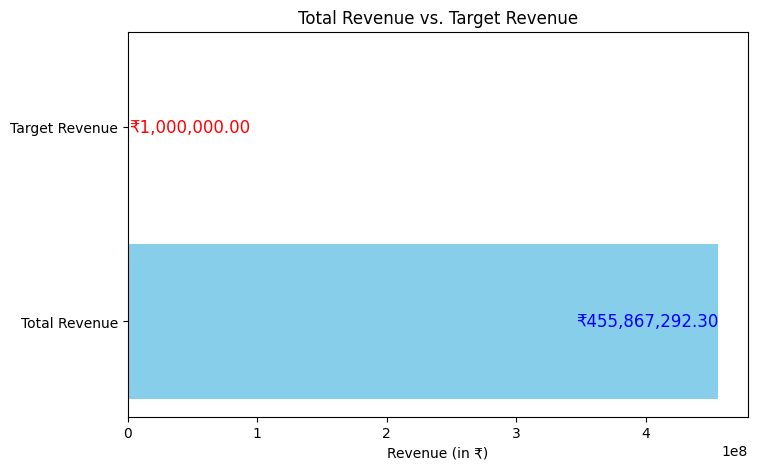

In [28]:
# SQL query for total revenue
query = "SELECT SUM(Price * Units_Sold) FROM ecommerce_management_dataset_14_columns"
cursor.execute(query)
total_revenue = cursor.fetchone()[0]

# Example: Using total revenue and a baseline (e.g., a target revenue) for comparison
target_revenue = 1000000  # Example target revenue for comparison

# Visualization with comparison
fig, ax = plt.subplots(figsize=(8, 5))

# Creating bars for total revenue and target revenue
ax.barh(["Total Revenue", "Target Revenue"], [total_revenue, target_revenue], color=['skyblue', 'salmon'])

# Labeling and titles for better clarity
ax.set_xlabel('Revenue (in ₹)')
ax.set_title('Total Revenue vs. Target Revenue')

# Adding text annotations for better clarity
ax.text(total_revenue, 0, f'₹{total_revenue:,.2f}', va='center', ha='right', color='blue', fontsize=12)
ax.text(target_revenue, 1, f'₹{target_revenue:,.2f}', va='center', ha='left', color='red', fontsize=12)

plt.show()


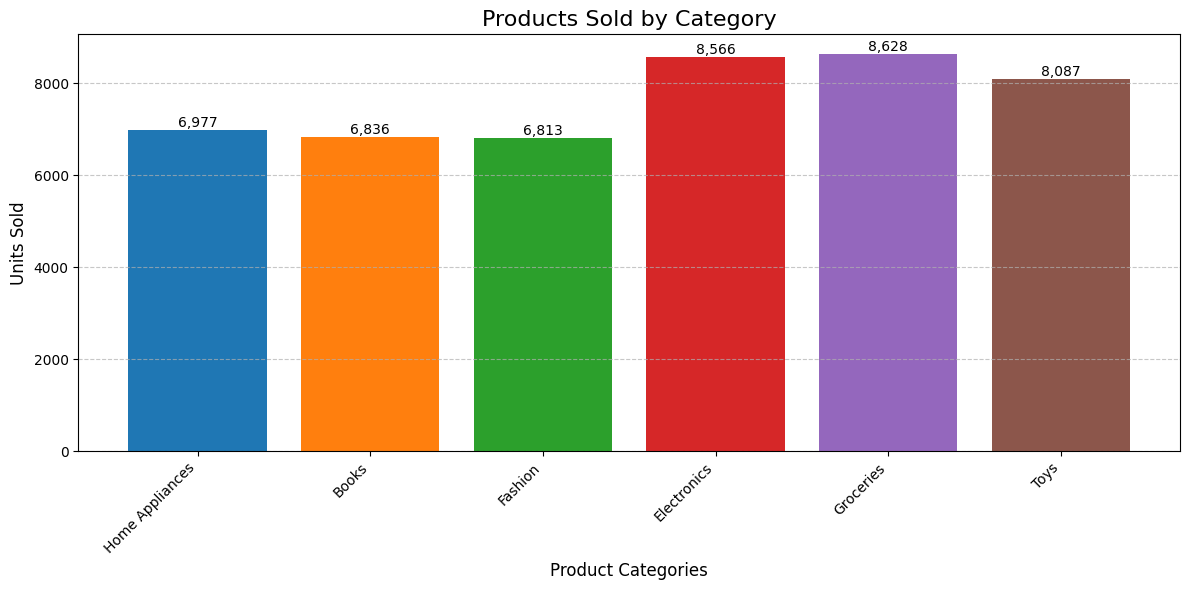

In [31]:
# SQL Query to calculate the total number of products sold
query = "SELECT Product_Category, SUM(Units_Sold) AS Total_Sold FROM ecommerce_management_dataset_14_columns GROUP BY Product_Category"
cursor.execute(query)
results = cursor.fetchall()

# Extracting data for visualization
categories = [row[0] for row in results]
units_sold = [row[1] for row in results]

# Creating the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(categories, units_sold, color=plt.cm.tab10.colors)  # Using a colormap for distinct colors

# Adding annotations on top of each bar
for bar, units in zip(bars, units_sold):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{units:,}', ha='center', va='bottom', fontsize=10)

# Customizing the chart
plt.title("Products Sold by Category", fontsize=16)
plt.xlabel("Product Categories", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()



Total Unique Products Sold: 593


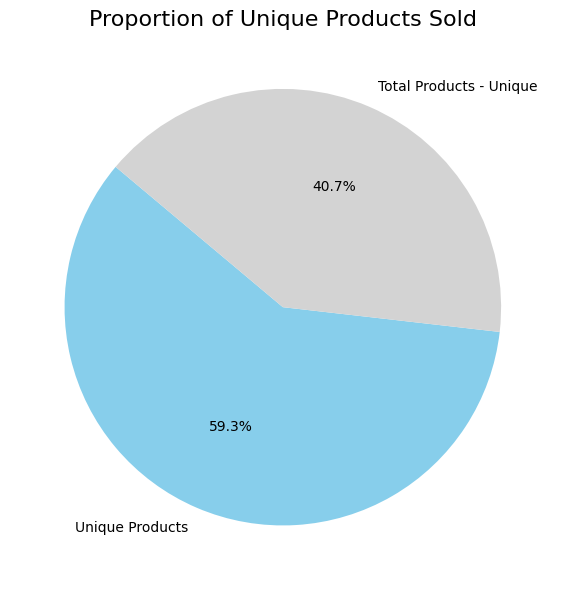

In [32]:
# Query to calculate the number of unique products sold
query = "SELECT COUNT(DISTINCT Product_ID) FROM ecommerce_management_dataset_14_columns"
cursor.execute(query)
unique_products = cursor.fetchone()[0]

# Printing the result
print(f"Total Unique Products Sold: {unique_products}")

# Visualizing the result
plt.figure(figsize=(6, 6))

# Pie chart for uniqueness visualization
labels = ['Unique Products', 'Total Products - Unique']
sizes = [unique_products, 1000 - unique_products]  # Assuming 1000 total for demonstration
colors = ['skyblue', 'lightgrey']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Unique Products Sold", fontsize=16)
plt.tight_layout()
plt.show()


Most Commonly Used Payment Method: Cash (241 times)


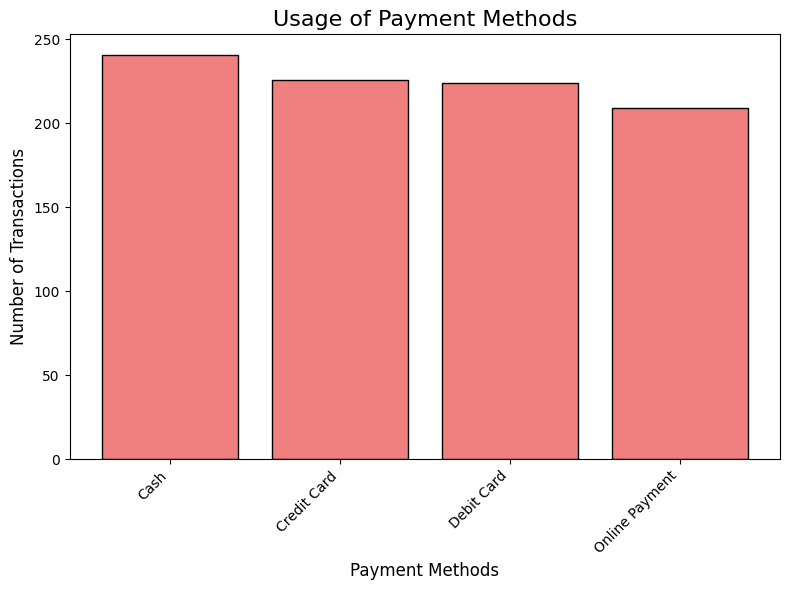

In [33]:
# Query to find the most commonly used payment method
query = """
SELECT Payment_Method, COUNT(*) AS Usage_Count
FROM ecommerce_management_dataset_14_columns
GROUP BY Payment_Method
ORDER BY Usage_Count DESC
LIMIT 1
"""
cursor.execute(query)
most_common_payment = cursor.fetchone()

# Query to fetch all payment methods and their usage counts for visualization
query_all = """
SELECT Payment_Method, COUNT(*) AS Usage_Count
FROM ecommerce_management_dataset_14_columns
GROUP BY Payment_Method
ORDER BY Usage_Count DESC
"""
cursor.execute(query_all)
payment_data = cursor.fetchall()

# Data preparation for visualization
payment_methods = [row[0] for row in payment_data]
usage_counts = [row[1] for row in payment_data]

# Printing the most commonly used payment method
print(f"Most Commonly Used Payment Method: {most_common_payment[0]} ({most_common_payment[1]} times)")

# Visualizing the payment method usage
plt.figure(figsize=(8, 6))
plt.bar(payment_methods, usage_counts, color='lightcoral', edgecolor='black')

plt.title("Usage of Payment Methods", fontsize=16)
plt.xlabel("Payment Methods", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Customer Segment with Highest Revenue: Corporate (Revenue: 165505509.96)


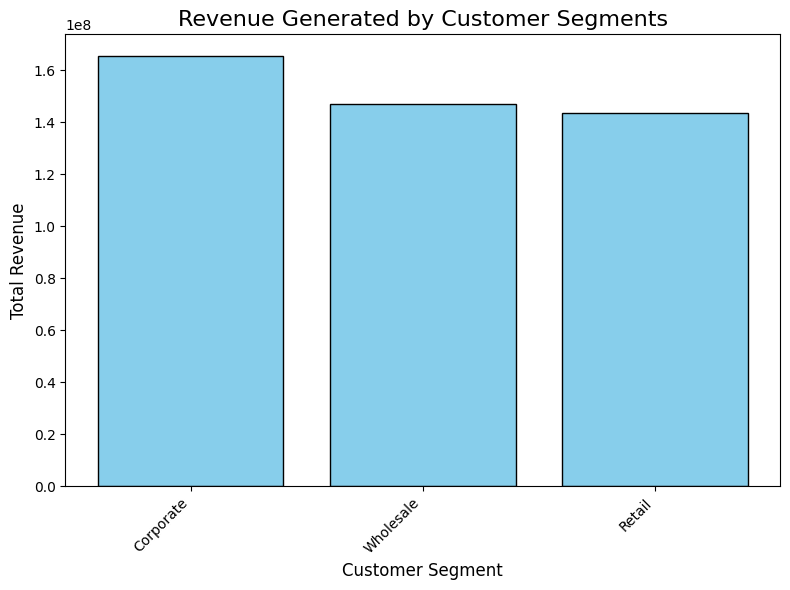

In [34]:
# Query to calculate revenue generated by each customer segment
query = """
SELECT Customer_Segment, SUM(Price * Units_Sold) AS Total_Revenue
FROM ecommerce_management_dataset_14_columns
GROUP BY Customer_Segment
ORDER BY Total_Revenue DESC
"""
cursor.execute(query)
segment_revenue_data = cursor.fetchall()

# Extracting the segment with the highest revenue
highest_revenue_segment = segment_revenue_data[0]

# Data preparation for visualization
segments = [row[0] for row in segment_revenue_data]
revenues = [row[1] for row in segment_revenue_data]

# Printing the customer segment with the highest revenue
print(f"Customer Segment with Highest Revenue: {highest_revenue_segment[0]} (Revenue: {highest_revenue_segment[1]:.2f})")

# Visualizing revenue by customer segment
plt.figure(figsize=(8, 6))
plt.bar(segments, revenues, color='skyblue', edgecolor='black')

plt.title("Revenue Generated by Customer Segments", fontsize=16)
plt.xlabel("Customer Segment", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Product Category with the Most Units Sold: Groceries (Units Sold: 8628)


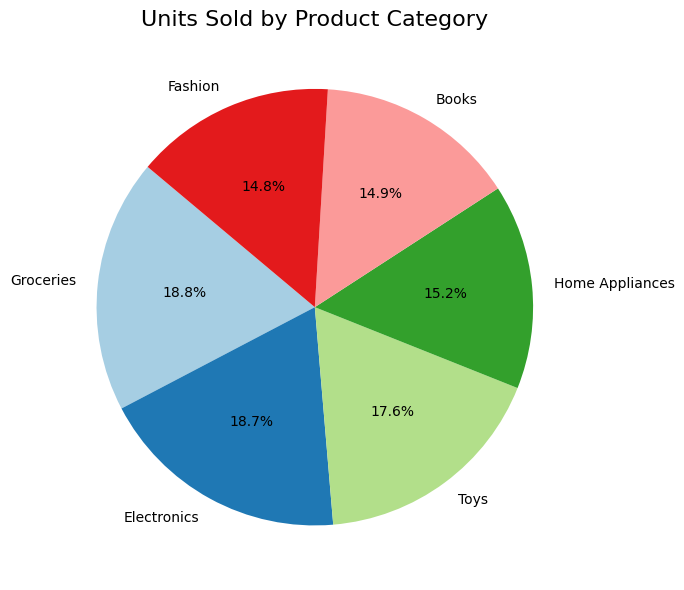

In [35]:
# Query to find the product category that sold the most units
query = """
SELECT Product_Category, SUM(Units_Sold) AS Total_Units_Sold
FROM ecommerce_management_dataset_14_columns
GROUP BY Product_Category
ORDER BY Total_Units_Sold DESC
"""
cursor.execute(query)
category_units_data = cursor.fetchall()

# Extracting the category with the most units sold
most_sold_category = category_units_data[0]

# Data preparation for visualization
categories = [row[0] for row in category_units_data]
units_sold = [row[1] for row in category_units_data]

# Printing the product category that sold the most units
print(f"Product Category with the Most Units Sold: {most_sold_category[0]} (Units Sold: {most_sold_category[1]})")

# Visualizing units sold by product category using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(units_sold, labels=categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Units Sold by Product Category", fontsize=16)
plt.tight_layout()
plt.show()


Product ID: PROD1046 | Average Discount: 9.33%
Product ID: PROD1881 | Average Discount: 21.00%
Product ID: PROD1776 | Average Discount: 10.00%
Product ID: PROD1829 | Average Discount: 8.00%
Product ID: PROD1165 | Average Discount: 28.00%
Product ID: PROD1110 | Average Discount: 7.00%
Product ID: PROD1419 | Average Discount: 26.00%
Product ID: PROD1791 | Average Discount: 24.50%
Product ID: PROD1840 | Average Discount: 23.00%
Product ID: PROD1444 | Average Discount: 1.00%
Product ID: PROD1821 | Average Discount: 3.50%
Product ID: PROD1978 | Average Discount: 17.50%
Product ID: PROD1544 | Average Discount: 5.33%
Product ID: PROD1936 | Average Discount: 10.00%
Product ID: PROD1496 | Average Discount: 6.50%
Product ID: PROD1284 | Average Discount: 9.50%
Product ID: PROD1590 | Average Discount: 2.00%
Product ID: PROD1973 | Average Discount: 22.50%
Product ID: PROD1793 | Average Discount: 0.00%
Product ID: PROD1332 | Average Discount: 22.00%
Product ID: PROD1112 | Average Discount: 27.00%
Pr

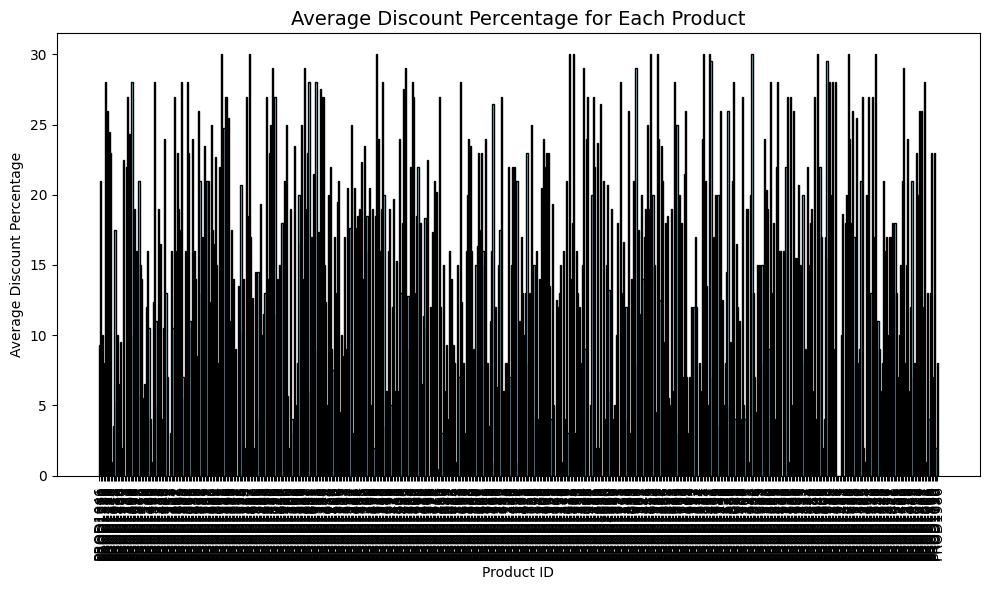

In [37]:
# Query to calculate the average discount percentage for each product
query = """
SELECT Product_ID, AVG(`Discount (%)`) AS Average_Discount
FROM ecommerce_management_dataset_14_columns
GROUP BY Product_ID
"""
cursor.execute(query)
products_data = cursor.fetchall()

# Extracting the product IDs and their average discount percentages
product_ids = [row[0] for row in products_data]
average_discounts = [row[1] for row in products_data]

# Printing the average discount for each product
for product_id, discount in zip(product_ids, average_discounts):
    print(f"Product ID: {product_id} | Average Discount: {discount:.2f}%")

# Visualization: Showing the average discount percentage for each product
plt.figure(figsize=(10, 6))
plt.bar(product_ids, average_discounts, color='skyblue', edgecolor='black')

# Customizing the chart
plt.xlabel('Product ID')
plt.ylabel('Average Discount Percentage')
plt.title('Average Discount Percentage for Each Product', fontsize=14)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()


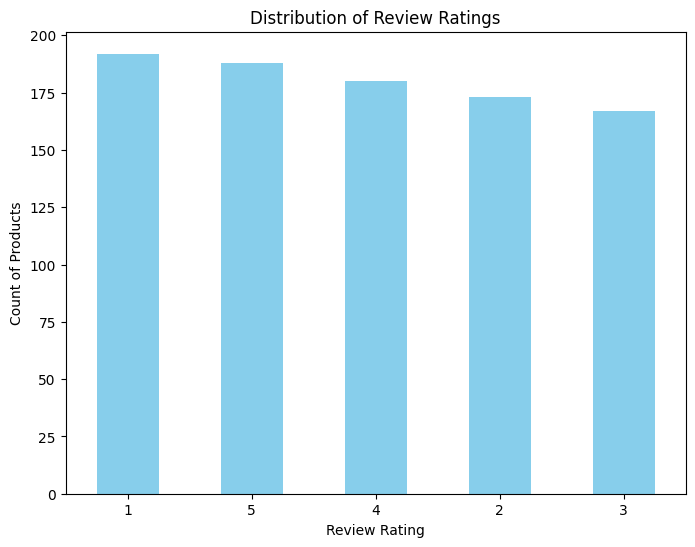

In [42]:
# Count the frequency of each review rating
rating_counts = data['Review_Rating'].value_counts()

# Bar chart for review ratings distribution
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count of Products')
plt.xticks(rotation=0)
plt.show()


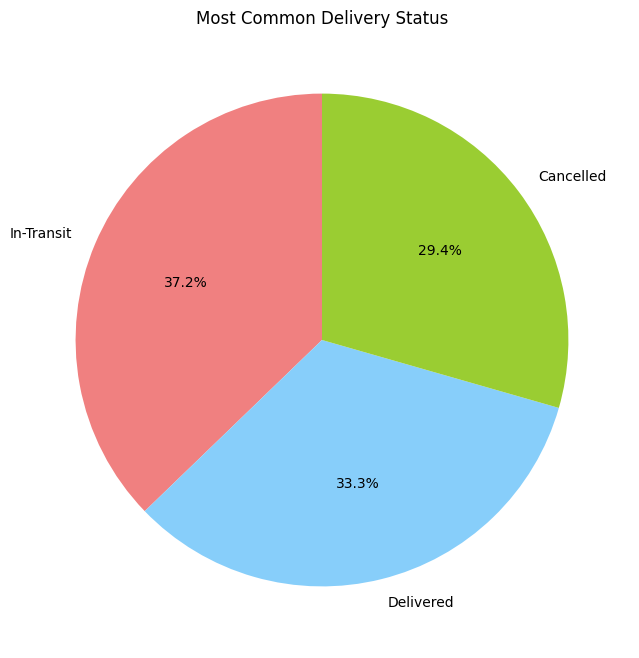

The most common delivery status is: In-Transit


In [43]:
# Count the frequency of each delivery status
delivery_status_counts = data['Delivery_Status'].value_counts()

# Find the most common delivery status
most_common_status = delivery_status_counts.idxmax()

# Pie chart for delivery status distribution
plt.figure(figsize=(8, 8))
delivery_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'yellowgreen', 'gold'])
plt.title('Most Common Delivery Status')
plt.ylabel('')  # Hide y-axis label for a cleaner look
plt.show()

# Print the most common delivery status
print(f"The most common delivery status is: {most_common_status}")


Average Review Rating for each Product Category:
Product_Category
Books              2.810606
Electronics        3.196319
Fashion            2.962687
Groceries          3.017241
Home Appliances    2.885714
Toys               3.063694
Name: Review_Rating, dtype: float64


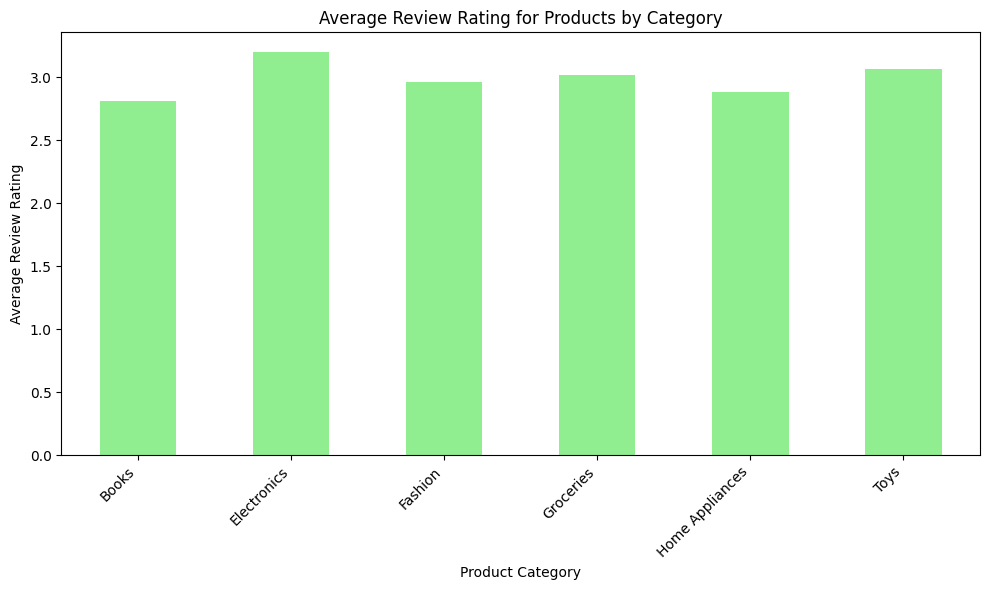

In [48]:
# Calculate the average review rating for all products by product category
avg_review_by_category = data.groupby('Product_Category')['Review_Rating'].mean()

# Display the average review rating by product category
print("Average Review Rating for each Product Category:")
print(avg_review_by_category)

# Plotting the average review rating by product category
plt.figure(figsize=(10, 6))
avg_review_by_category.plot(kind='bar', color='lightgreen')

# Adding title and labels to the chart
plt.title('Average Review Rating for Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Review Rating')

# Displaying the chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
 conclusion,
this analysis helps in gaining a deeper understanding of product sales, customer behavior, and overall marketplace performance.
It provides actionable insights that can be used to refine sales strategies, improve customer satisfaction, and make data-driven decisions for inventory and marketing management.